# Tutorial X: Luria-Delbrück

© 2017 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)  

---

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting environment.
%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

## Introduction.

As explained in the document with the experiment background Luria and Delbrück wanted to discern between two standing theories of inheritance:

Post–adaptive mutations (aquired immunity hypothesis)
Pre–adaptive mutations (inherited mutations hypothesis)
In this document we numerically simulate both hypothesis in order to get a feeling of what to expect from both scenarios in our experiments. But in order to simulate these hypothesis we must recall the possible outcomes of each scenario as depicted in the following figure

![title](images/figure_21_30.jpg)

### Aquired immunity hypothesis

As shown in the figure there are four different outcomes for the adaptive mutation hypothesis. What this scenario assumes is that given a fixed number of cells plated on selective media are in some fashion "induced" to undergo mutations allowing survival given a probability  of mutating.

Our objective is then, given a fixed number of cells, to "toss the coin" for each cell in order to decide if they will acquire the mutation and survive or not.

Let's first initialize the variables that we will need

In [16]:
# probability that a particular cell will acquire the mutation
mut_rate = 1e-5;
# number of cells in the simulation
n_cells = 128000;

Now let's determine the number of simulations to run and initialize the array to save our results

In [11]:
# number of simulations
n_simulations = 1000;
# initialize array to save outcomes
outcomes = np.zeros(n_simulations)

Time to run the simulation! For this we will generate random numbers between 0 and 1 using the function `np.random.rand`. Since these numbers are generated using a uniform distribution, i.e. each number has equal probability of occurring, the numbers that are less than or equal to our mutation rate add up to this probability. If you are not sure about this claim try to integrate the PDF of this distribution from zero to an unknown variable $x$ such that the integral is equal to the mutation rate.

In [21]:
# run simulation!
for i in np.arange(n_simulations):
    outcomes[i] = np.sum(np.random.rand(n_cells) < mut_rate)

Let's now plot the histogram of the results to visualize the expected distribution.

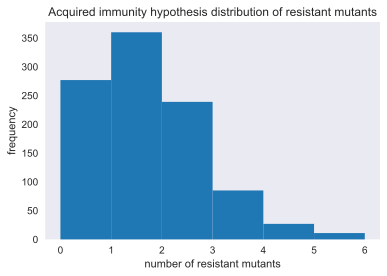

In [22]:
# plot the histogram with bins of size 1
plt.hist(outcomes, bins=np.arange(0, np.max(outcomes)))
plt.xlabel('number of resistant mutants')
plt.ylabel('frequency')
_= plt.title('Acquired immunity hypothesis distribution of resistant mutants')

Let's now display the relevant quantities that will tell us something about the validity of this hypothesis

In [23]:
print('Mean number of mutants: ', np.mean(outcomes))

Mean number of mutants:  1.264


In [25]:
print('Variance in number of mutants: ', np.var(outcomes))

Variance in number of mutants:  1.250304


In [42]:
print('Fano-factor: ', np.var(outcomes) / np.mean(outcomes))

Fano-factor:  0.989164556962


# Inherited mutation hypothesis

The alternative scenario assumes that mutations occur at random with which natural variability of th population increases over time. Once a selection agent on the environment appears, only the cells with the right mutations will survive. In order to simulate this scenario we will write down a function to perform the simulation.
The steps that the function must follow are:
1. Given an initial number of cells duplicate all these cells to simulate cell division.
2. Flip a coin for each of the recently duplicated cells to decide which ones acquire the mutation to survive.
3. Check back for the daughter cells that were born from a mother cell that was already a mutant and define them as resistant mutant as well.

Let's define our function then. This function will take as input 3 parameters:
1. `mut_rate`. The mutation rate
2. `n_0`. The initial number of cells
3. `n_div`. The number of divisions.

In [31]:
def inherited_mut(mut_rate, n_0, n_div):
    '''
    Function to simulate the inherited mutation hypothesis
    Parameter
    ---------
    mut_rate : float. 
      probability of a basepair mutating
    n_0 : int. 
      initial number of cells in the simulation
    n_divisions: int. 
      number of simulated divisions
    #
    Output
    ------
    num_mutants : int. 
      Number of resistan mutants afteer n_divisions
    '''
    # Initialize array to save cells
    cells = np.zeros(n_0)
    # Loop through cell divisions to perform simulation
    for div in np.arange(n_div):
        # Duplicate cells
        daughter_cells = cells
        # Save current number of daughter cells
        n_cells = len(daughter_cells)
        # find cells that mutate generating random numbers between 0 and 1
        # those that are less than the mutation rate are considered resistant
        # mutants
        mutators = np.random.rand(n_cells) < mut_rate
        # to account for cells whose mother cell was already a mutant we use
        # a simple boolean OR function. If the mother was mutant OR the
        # daughter turned to be a mutant the daughter must stay as mutant then
        daughter_cells = np.logical_or(daughter_cells, mutators)
        # concatenate both arrays
        cells = np.concatenate([cells, daughter_cells])
    
    # Compute the total number of mutant cells
    num_mut = np.sum(cells)
    
    # Return this value
    return num_mut

Having defined the function let's define the parameters for the simulation.

In [32]:
# mutation rate calibrated to give ≈ 1 mutant per plate.
mut_rate_inherit = 3e-6;
# initial number of cells
n_0 = 1000;
# number of cell divisions
n_divisions = 7;
# note that 128000 = 1000 * 2^7 if you were wondering why we chose that number

Now let's repeat the simulation 1000 times to plot the histogram. This should be pretty simple now that we have defined our fancy function.

In [34]:
# Define number of simulations
n_simulations = 1000
# Initialize array to save the final number of mutant cells
outcomes_inherit = np.zeros(n_simulations)
# Loop through number of cells
for i in np.arange(n_simulations):
    # Register final number of mutant cells
    outcomes_inherit[i] = inherited_mut(mut_rate_inherit, n_0, n_divisions)

Now let's look at the distribution.

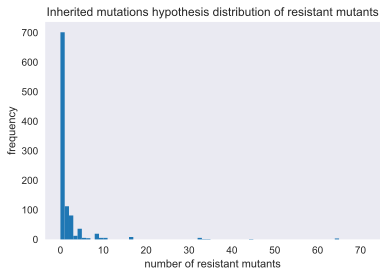

In [38]:
plt.hist(outcomes_inherit, np.arange(np.max(outcomes_inherit)))
plt.xlabel('number of resistant mutants')
plt.ylabel('frequency')
_= plt.title('Inherited mutations hypothesis distribution of resistant mutants')

Right away we can see that these distributions are extremely different. Just to confirm that let's compute the relevant quantities.

In [39]:
print('Mean number of mutants: ', np.mean(outcomes_inherit))

Mean number of mutants:  1.413


In [40]:
print('Variance in number of mutants: ', np.var(outcomes_inherit))

Variance in number of mutants:  30.334431


In [43]:
print('Fano-factor: ', np.var(outcomes_inherit) / np.mean(outcomes_inherit))

Fano-factor:  21.468104034


Wow! There are definitely significant differences between the expected distirbutions given both hypothesis. This was the beauty of Luria and Delbruck's insight . Quantitative predictions testable with a clever experiment allow them to distinguish between proposed inheritance mechanisms!